In [4]:
from parameters import *
from cache import *
from infra import *
from events import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


POISSON_PROCESS_NEW_REQUESTS_LAMBDA = 100
PARETO_PROCESS_NEW_FILE_SIZE_A = 2
PARETO_PROCESS_NEW_FILE_SIZE_M = 1
PARETO_PROCESS_FILE_POPULARITY_A = 1
PARETO_PROCESS_FILE_POPULARITY_M = 1
LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_MEAN = 0.5
LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_SIGMA = 0.4

TOTAL_NO_OF_FILES = 10000
INSTITUTIONAL_BANDWIDTH = 1000
ACCESS_LINK_BANDWIDTH = 25
TOTAL_TIME_TO_RUN = 5
CACHE_CAPACITY = 500
CACHE_MAX_ALLOWED_FILE_SIZE = 200
SIMULATOR_ITERATIONS = 15

Cache system - No_Cache
Average number of req served during simulations - 497.0
Average Response rate for the requests - 19.069906882927462
Average Queue delay in the process - 17.201767998598733


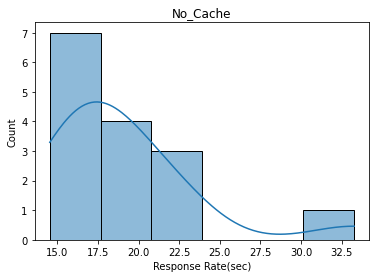



*********************XXXXXXXXXXXXXX*********************


Cache system - LFU_Cache
Average number of req served during simulations - 502.26666666666665
Average Response rate for the requests - 12.401515439709737
Average Queue delay in the process - 13.5999592375323


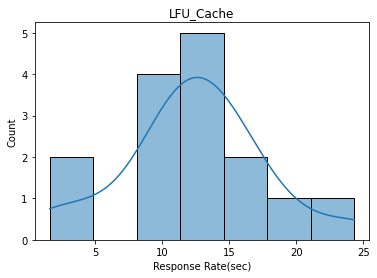



*********************XXXXXXXXXXXXXX*********************


Cache system - LRU_Cache
Average number of req served during simulations - 504.26666666666665
Average Response rate for the requests - 10.888676885796862
Average Queue delay in the process - 11.870236582095684


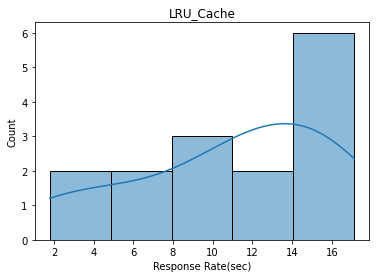



*********************XXXXXXXXXXXXXX*********************


Cache system - MRU_Cache
Average number of req served during simulations - 496.53333333333336
Average Response rate for the requests - 11.086975943617706
Average Queue delay in the process - 11.882552591006178


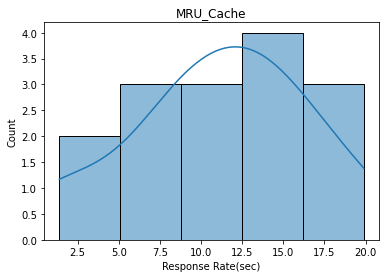



*********************XXXXXXXXXXXXXX*********************




In [5]:
# Different cache sizes under same situation
cache_types = [No_Cache,LFU_Cache,LRU_Cache,MRU_Cache]
for cache_type in cache_types:
    total_times = []
    queue_delays = []
    req_served = []
    for iteration in range(SIMULATOR_ITERATIONS):

        # initialize simulator environment

        sim = Simulator_Env(cache_type = cache_type,
                 cache_capacity=CACHE_CAPACITY,
                 cache_max_allowed_file_size=CACHE_MAX_ALLOWED_FILE_SIZE,
                 cache_init_files=[],
                 total_files = TOTAL_NO_OF_FILES, 
                 poisson_req_rate=POISSON_PROCESS_NEW_REQUESTS_LAMBDA,
                 pareto_popularity_a = PARETO_PROCESS_FILE_POPULARITY_A,
                 pareto_popularity_m = PARETO_PROCESS_FILE_POPULARITY_M,
                 pareto_size_a=PARETO_PROCESS_NEW_FILE_SIZE_A,
                 pareto_size_m=PARETO_PROCESS_NEW_FILE_SIZE_M,                 
                 lognormal_mean=LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_MEAN,
                 lognormal_sigma=LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_SIGMA,
                 access_link=ACCESS_LINK_BANDWIDTH,
                 institutional_bandwidth=INSTITUTIONAL_BANDWIDTH)

        #initialize new req events to be processed at every second
        for i in range(TOTAL_TIME_TO_RUN):
            E_get_new_reqs(sim,i,requestrate=sim.req_rate)


        #Main simulator loop
        while(len(sim.sim_q.q)):

            e = sim.sim_q.pop()
            e.process()    


        total_times.append(np.mean(sim.get_total_times_for_reqs()))
        queue_delays.append(np.mean(sim.queue_delays))
        req_served.append(sim.req_count)

    print("Cache system - " + sim.cache.__class__.__name__)
    print('Average number of req served during simulations - ' + str(np.mean(req_served)))
    print('Average Response rate for the requests - ' + str(np.mean(total_times)))
    print('Average Queue delay in the process - ' + str(np.mean(queue_delays)))
    p = sns.histplot(data=total_times,kde=True)
    p.set_xlabel('Response Rate(sec)')
    p.set_title(sim.cache.__class__.__name__)
    # p.set_xlim(0,10)

    plt.show()
    print('\n')
    print('*********************XXXXXXXXXXXXXX*********************')
    print('\n')


Cache capacity - 10
Average number of req served during simulations - 5032.6
Average Response rate for the requests - 169.6115329048585
Average Queue delay in the process - 218.43296814203342


*********************XXXXXXXXXXXXXX*********************


Cache capacity - 50
Average number of req served during simulations - 5027.1
Average Response rate for the requests - 106.31060532889089
Average Queue delay in the process - 169.80255217562907


*********************XXXXXXXXXXXXXX*********************


Cache capacity - 100
Average number of req served during simulations - 4991.7
Average Response rate for the requests - 88.72570971586006
Average Queue delay in the process - 154.9303263184766


*********************XXXXXXXXXXXXXX*********************


Cache capacity - 150
Average number of req served during simulations - 5021.5
Average Response rate for the requests - 94.8706615253993
Average Queue delay in the process - 156.07537177344787


*********************XXXXXXXXXXXXXX***********

C:\Users\BREAL\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


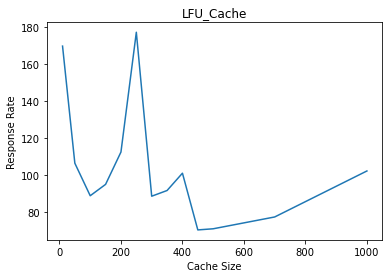

In [23]:
#Cache size experiments for LFU
SIMULATOR_ITERATIONS = 10
cache_types = [LFU_Cache]
cache_sizes = [10,50,100,150,200,250,300,350,400,450,500,700,1000]
cache_times = []
for cache_capacity in cache_sizes:
    for cache_type in cache_types:
        total_times = []
        queue_delays = []
        req_served = []
        for iteration in range(SIMULATOR_ITERATIONS):

            # initialize simulator environment
            files = Files(PARETO_PROCESS_FILE_POPULARITY_A,PARETO_PROCESS_FILE_POPULARITY_M,PARETO_PROCESS_NEW_FILE_SIZE_A,PARETO_PROCESS_NEW_FILE_SIZE_M,)
            cache = cache_type(files,capacity=cache_capacity,max_file_size=CACHE_MAX_ALLOWED_FILE_SIZE)
            # cache = Cache(files)

            sim = Simulator_Env(files,cache)

            #initialize new req events to be processed at every second
            for i in range(TOTAL_TIME_TO_RUN):
                E_get_new_reqs(sim,i,requestrate=POISSON_PROCESS_NEW_REQUESTS_LAMBDA)


            #Main simulator loop
            while(len(sim.sim_q.q)):

                e = sim.sim_q.pop()
                e.process()    


            total_times.append(np.mean(sim.get_total_times_for_reqs()))
            queue_delays.append(np.mean(sim.queue_delays))
            req_served.append(sim.req_count)

        print("Cache capacity - " + str(cache.capacity))
        print('Average number of req served during simulations - ' + str(np.mean(req_served)))
        print('Average Response rate for the requests - ' + str(np.mean(total_times)))
        print('Average Queue delay in the process - ' + str(np.mean(queue_delays)))
        cache_times.append(np.mean(total_times))
        # p = sns.histplot(data=total_times,kde=True)
        # p.set_xlabel('time(sec)')
        # p.set_title(cache.__class__.__name__)
        # p.set_xlim(0,10)

        # plt.show()
        print('\n')
        print('*********************XXXXXXXXXXXXXX*********************')
        print('\n')
print("Below is a graph showing dependancy of response times with cache sizes")

p = sns.lineplot(cache_sizes,cache_times)
p.set_xlabel('Cache Size')
p.set_ylabel('Response Rate')
p.set_title(cache.__class__.__name__)
plt.show()

Request rate - 10
Average number of req served during simulations - 99.1
Average Response rate for the requests - 1.6231724465873776
Average Queue delay in the process - 0.459780085530045


*********************XXXXXXXXXXXXXX*********************


Request rate - 20
Average number of req served during simulations - 203.6
Average Response rate for the requests - 4.493198996150727
Average Queue delay in the process - 4.191333523522566


*********************XXXXXXXXXXXXXX*********************


Request rate - 50
Average number of req served during simulations - 510.0
Average Response rate for the requests - 13.908951921559256
Average Queue delay in the process - 16.659806411964674


*********************XXXXXXXXXXXXXX*********************


Request rate - 75
Average number of req served during simulations - 770.9
Average Response rate for the requests - 21.715398096272537
Average Queue delay in the process - 28.21096716546564


*********************XXXXXXXXXXXXXX*********************


R

C:\Users\BREAL\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


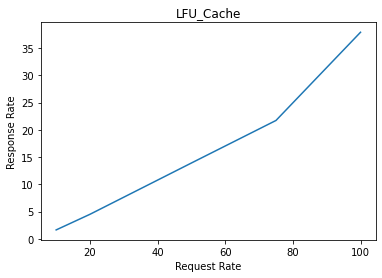

In [16]:
#Cache size experiments for LFU
SIMULATOR_ITERATIONS = 10
cache_types = [LFU_Cache]
lmdas = [10,20,50,75,100]
cache_times = []
for lmda in lmdas:
    for cache_type in cache_types:
        total_times = []
        queue_delays = []
        req_served = []
        for iteration in range(SIMULATOR_ITERATIONS):

            # initialize simulator environment
            files = Files(PARETO_PROCESS_FILE_POPULARITY_A,PARETO_PROCESS_FILE_POPULARITY_M,PARETO_PROCESS_NEW_FILE_SIZE_A,PARETO_PROCESS_NEW_FILE_SIZE_M,)
            cache = cache_type(files,capacity=CACHE_CAPACITY,max_file_size=CACHE_MAX_ALLOWED_FILE_SIZE)
            # cache = Cache(files)

            sim = Simulator_Env(files,cache)

            #initialize new req events to be processed at every second
            for i in range(TOTAL_TIME_TO_RUN):
                E_get_new_reqs(sim,i,requestrate=lmda)


            #Main simulator loop
            while(len(sim.sim_q.q)):

                e = sim.sim_q.pop()
                e.process()    


            total_times.append(np.mean(sim.get_total_times_for_reqs()))
            queue_delays.append(np.mean(sim.queue_delays))
            req_served.append(sim.req_count)

        print("Request rate - " + str(lmda))
        print('Average number of req served during simulations - ' + str(np.mean(req_served)))
        print('Average Response rate for the requests - ' + str(np.mean(total_times)))
        print('Average Queue delay in the process - ' + str(np.mean(queue_delays)))
        cache_times.append(np.mean(total_times))
        # p = sns.histplot(data=total_times,kde=True)
        # p.set_xlabel('time(sec)')
        # p.set_title(cache.__class__.__name__)
        # p.set_xlim(0,10)

        # plt.show()
        print('\n')
        print('*********************XXXXXXXXXXXXXX*********************')
        print('\n')
print("Below is a graph showing dependancy of response times with response rates")

p = sns.lineplot(lmdas,cache_times)
p.set_xlabel('Request Rate')
p.set_ylabel('Response Rate')
p.set_title(cache.__class__.__name__)
plt.show()

File Size Pareto alpha - 10
Average number of req served during simulations - 985.2
Average Response rate for the requests - 15.221173556821707
Average Queue delay in the process - 19.15009340283992


*********************XXXXXXXXXXXXXX*********************


File Size Pareto alpha - 20
Average number of req served during simulations - 1009.0
Average Response rate for the requests - 15.537433109174753
Average Queue delay in the process - 19.663373517283524


*********************XXXXXXXXXXXXXX*********************


File Size Pareto alpha - 50
Average number of req served during simulations - 1005.8
Average Response rate for the requests - 15.339137897772229
Average Queue delay in the process - 19.053924892744128


*********************XXXXXXXXXXXXXX*********************


File Size Pareto alpha - 75
Average number of req served during simulations - 1007.8
Average Response rate for the requests - 14.511330634722375
Average Queue delay in the process - 18.241208411816295


*************

C:\Users\BREAL\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


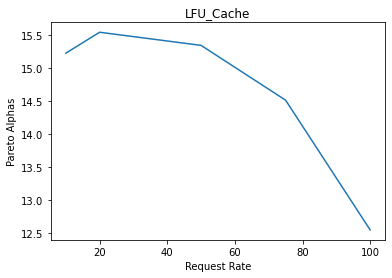

In [18]:
#Cache size experiments for LFU
SIMULATOR_ITERATIONS = 10
cache_types = [LFU_Cache]
Pareto_File_Size_A = [10,20,50,75,100]
cache_times = []
for alpha in Pareto_File_Size_A:
    for cache_type in cache_types:
        total_times = []
        queue_delays = []
        req_served = []
        for iteration in range(SIMULATOR_ITERATIONS):

            # initialize simulator environment
            files = Files(PARETO_PROCESS_FILE_POPULARITY_A,PARETO_PROCESS_FILE_POPULARITY_M,alpha,PARETO_PROCESS_NEW_FILE_SIZE_M,)
            cache = cache_type(files,capacity=CACHE_CAPACITY,max_file_size=CACHE_MAX_ALLOWED_FILE_SIZE)
            # cache = Cache(files)

            sim = Simulator_Env(files,cache)

            #initialize new req events to be processed at every second
            for i in range(TOTAL_TIME_TO_RUN):
                E_get_new_reqs(sim,i,requestrate=POISSON_PROCESS_NEW_REQUESTS_LAMBDA)


            #Main simulator loop
            while(len(sim.sim_q.q)):

                e = sim.sim_q.pop()
                e.process()    


            total_times.append(np.mean(sim.get_total_times_for_reqs()))
            queue_delays.append(np.mean(sim.queue_delays))
            req_served.append(sim.req_count)

        print("File Size Pareto alpha - " + str(alpha))
        print('Average number of req served during simulations - ' + str(np.mean(req_served)))
        print('Average Response rate for the requests - ' + str(np.mean(total_times)))
        print('Average Queue delay in the process - ' + str(np.mean(queue_delays)))
        cache_times.append(np.mean(total_times))
        # p = sns.histplot(data=total_times,kde=True)
        # p.set_xlabel('time(sec)')
        # p.set_title(cache.__class__.__name__)
        # p.set_xlim(0,10)

        # plt.show()
        print('\n')
        print('*********************XXXXXXXXXXXXXX*********************')
        print('\n')
print("Below is a graph showing dependancy of response times with Pareto distributions for file size parameter alpha")

p = sns.lineplot(lmdas,cache_times)
p.set_xlabel('Request Rate')
p.set_ylabel('Pareto Alphas')
p.set_title(cache.__class__.__name__)
plt.show()

In [20]:
POISSON_PROCESS_NEW_REQUESTS_LAMBDA = 100
PARETO_PROCESS_NEW_FILE_SIZE_A = 2
PARETO_PROCESS_NEW_FILE_SIZE_M = 1
PARETO_PROCESS_FILE_POPULARITY_A = 1
PARETO_PROCESS_FILE_POPULARITY_M = 1
LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_MEAN = 0.5
LOGNORMAL_PROCESS_ARRIVE_AT_QUEUE_SIGMA = 0.4

TOTAL_NO_OF_FILES = 10000
INSTITUTIONAL_BANDWIDTH = 1000
ACCESS_LINK_BANDWIDTH = 15
TOTAL_TIME_TO_RUN = 50
CACHE_CAPACITY = 3000
CACHE_MAX_ALLOWED_FILE_SIZE = 10
SIMULATOR_ITERATIONS = 15
cache_type = LFU_Cache
for iteration in range(10):

    # initialize simulator environment
    files = Files(PARETO_PROCESS_FILE_POPULARITY_A,PARETO_PROCESS_FILE_POPULARITY_M,PARETO_PROCESS_NEW_FILE_SIZE_A,PARETO_PROCESS_NEW_FILE_SIZE_M,)
    cache = cache_type(files,capacity=CACHE_CAPACITY,max_file_size=CACHE_MAX_ALLOWED_FILE_SIZE)
    # cache = Cache(files)

    sim = Simulator_Env(files,cache,access_link=ACCESS_LINK_BANDWIDTH)

    #initialize new req events to be processed at every second
    for i in range(TOTAL_TIME_TO_RUN):
        E_get_new_reqs(sim,i,requestrate=POISSON_PROCESS_NEW_REQUESTS_LAMBDA)


    #Main simulator loop
    while(len(sim.sim_q.q)):

        e = sim.sim_q.pop()
        e.process()    
    print(cache.storage_left,len(cache.store),np.median(sim.get_total_times_for_reqs()),np.mean(sim.get_total_times_for_reqs()))


    # total_times.append(np.mean(sim.get_total_times_for_reqs()))
    # queue_delays.append(np.mean(sim.queue_delays))
    # req_served.append(sim.req_count)

82.05718815909034 1641 56.88835631173387 101.00091131182246
0.6007834443384783 1634 94.22810835647746 134.26198555307994
0.47490071687300195 1681 133.80332715948228 150.66060756676606
328.1526424776521 1494 14.281864492311247 88.33552814403461
144.15455253402968 1617 18.878914870091037 77.90792706002146
2.086786026962857 1653 108.0987054672571 137.99693817277233
188.4552053275342 1489 0.0036650118109022856 76.98947031015469
799.9363271589286 1206 0.0016921534834999363 42.29183683020267
1.8199939472940236 1632 38.04344434864826 90.04678005950369
1.3030898919536162 1655 303.0294300701107 328.3061680005915


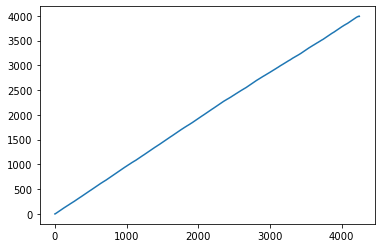

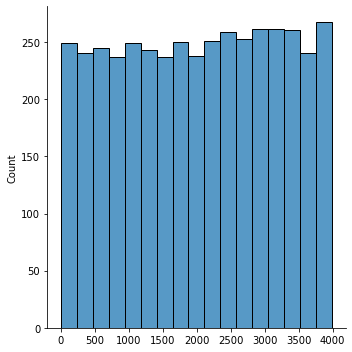

In [21]:
p = sns.lineplot(data=sim.fifo_size)
# p.set_xlim(0,10)
plt.show()
p = sns.displot(sim.fifo_size)
# p.set_xlim(0,10)
plt.show()

In [36]:
np.median(files.size)

1.417877178504507